In [1]:
# import libraries possible needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
# import dataset
spotify_data = pd.read_csv('spotify_data.csv')
train = spotify_data[spotify_data['release_year']!=2021]
train.head()

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2471,23918,rap,Thug Slime,55,No Space,51,136000,1,2020,0.836,...,0,-8.260,1,0.285,0.186,0.000033,0.2070,0.872,149.947,4
2472,23918,rap,Thug Slime,55,Theios,49,187636,1,2020,0.852,...,1,-7.111,1,0.397,0.402,0.000000,0.0954,0.333,165.032,4
2473,23918,rap,Thug Slime,55,Slime DNA,49,220690,1,2020,0.708,...,2,-5.259,0,0.354,0.400,0.000000,0.1090,0.471,173.932,4
2474,23918,rap,Thug Slime,55,Blackout,44,144100,1,2020,0.812,...,1,-8.835,0,0.343,0.308,0.000000,0.1040,0.743,150.152,4
2475,23918,rap,Thug Slime,55,Bleeding,42,175964,1,2020,0.875,...,7,-10.325,0,0.224,0.343,0.000000,0.1610,0.613,120.054,4


In [5]:
train.corr()

,artist_followers,artist_popularity,track_popularity,duration_ms,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist_followers,1.000000,0.569029,0.227808,0.045816,0.090379,0.081093,-0.021728,0.078912,0.001377,0.117326,0.007882,-0.060725,-0.105583,-0.030470,0.007057,-0.057830,0.017351,0.029300
artist_popularity,0.569029,1.000000,0.299639,-0.096507,0.088882,0.046994,0.031242,0.036566,-0.010654,0.037195,0.021831,0.240436,-0.071960,-0.063921,0.104561,-0.036097,-0.033457,-0.036074
track_popularity,0.227808,0.299639,1.000000,0.063703,0.188473,0.576942,0.158348,0.220601,0.013335,0.298486,-0.021769,-0.058812,-0.288464,-0.122612,-0.090723,-0.037661,0.057826,0.072216
duration_ms,0.045816,-0.096507,0.063703,1.000000,-0.019538,0.074070,-0.144161,0.076592,0.007869,0.080056,-0.036544,-0.332621,-0.135887,0.067308,-0.035818,-0.156656,0.051721,0.085859
explicit,0.090379,0.088882,0.188473,-0.019538,1.000000,0.208180,0.132106,0.105374,0.012769,0.123166,-0.057148,0.074034,-0.129282,-0.036948,-0.021709,-0.031477,0.005531,0.042725
release_year,0.081093,0.046994,0.576942,0.074070,0.208180,1.000000,0.198563,0.340067,0.022148,0.429776,-0.067829,-0.035714,-0.369435,-0.149211,-0.042394,-0.068977,0.080067,0.088514
danceability,-0.021728,0.031242,0.158348,-0.144161,0.132106,0.198563,1.000000,0.135647,0.020085,0.137115,-0.048761,0.198497,-0.141260,-0.177002,-0.113679,0.507885,-0.126926,0.109822
energy,0.078912,0.036566,0.220601,0.076592,0.105374,0.340067,0.135647,1.000000,0.030913,0.748107,-0.053146,-0.042915,-0.678980,-0.129716,0.126978,0.347990,0.206664,0.170711
key,0.001377,-0.010654,0.013335,0.007869,0.012769,0.022148,0.020085,0.030913,1.000000,0.024739,-0.139971,-0.003821,-0.023442,-0.006522,-0.011534,0.023827,0.008420,0.007760
loudness,0.117326,0.037195,0.298486,0.080056,0.123166,0.429776,0.137115,0.748107,0.024739,1.000000,-0.027288,-0.173610,-0.492275,-0.265882,0.004740,0.209068,0.172408,0.145232


In [6]:
train.corrwith(train['track_popularity']).sort_values(ascending=False)

track_popularity     1.000000
release_year         0.576942
artist_popularity    0.299639
loudness             0.298486
artist_followers     0.227808
energy               0.220601
explicit             0.188473
danceability         0.158348
time_signature       0.072216
duration_ms          0.063703
tempo                0.057826
key                  0.013335
mode                -0.021769
valence             -0.037661
speechiness         -0.058812
liveness            -0.090723
instrumentalness    -0.122612
acousticness        -0.288464
dtype: float64

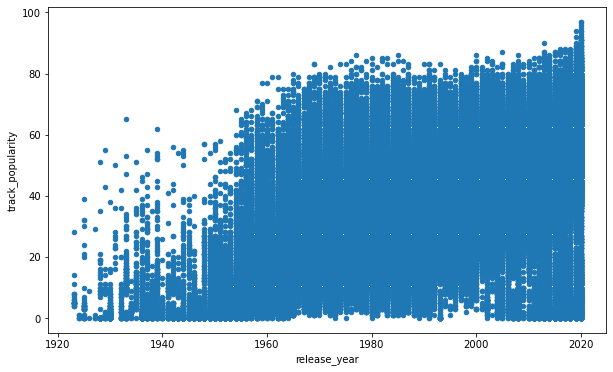

In [7]:
ax = train.plot(x = 'release_year', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'release_year', 
              ylabel = 'track_popularity')

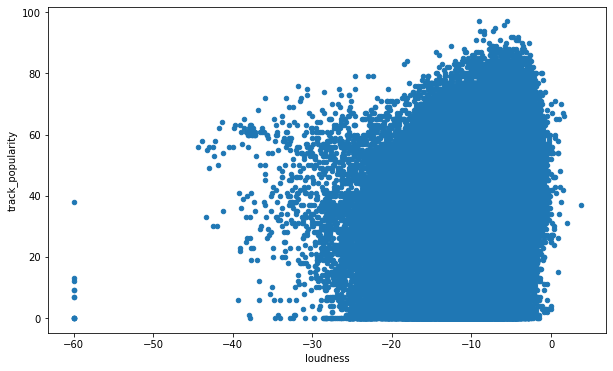

In [8]:
ax = train.plot(x = 'loudness', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'loudness', 
              ylabel = 'track_popularity')

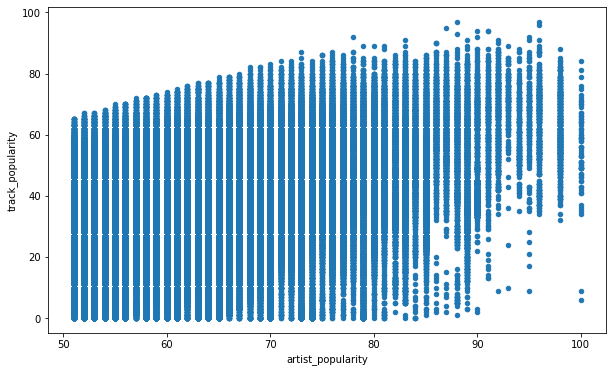

In [9]:
ax = train.plot(x = 'artist_popularity', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'artist_popularity', 
              ylabel = 'track_popularity')

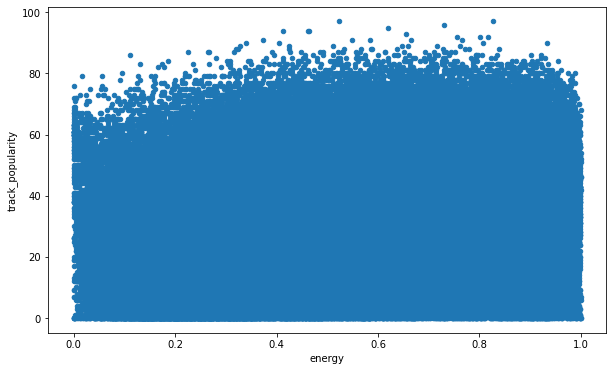

In [10]:
ax = train.plot(x = 'energy', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'energy', 
              ylabel = 'track_popularity')

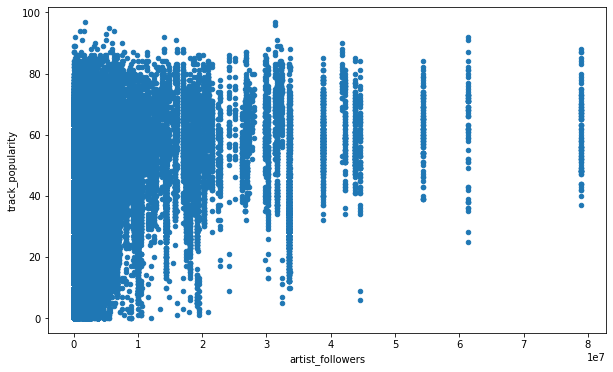

In [11]:
ax = train.plot(x = 'artist_followers', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'artist_followers', 
              ylabel = 'track_popularity')

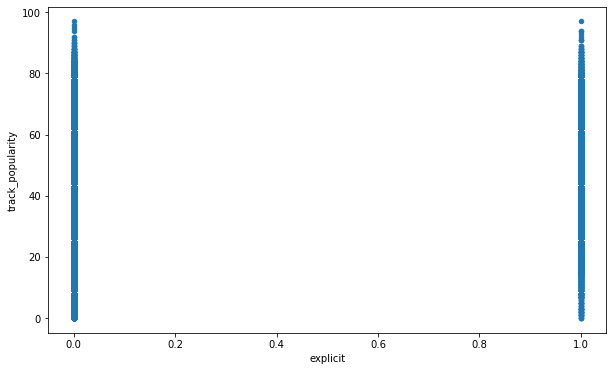

In [12]:
ax = train.plot(x = 'explicit', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'explicit', 
              ylabel = 'track_popularity')

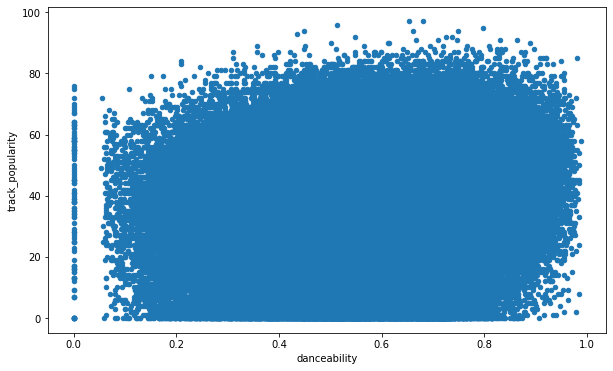

In [13]:
ax = train.plot(x = 'danceability', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'danceability', 
              ylabel = 'track_popularity')

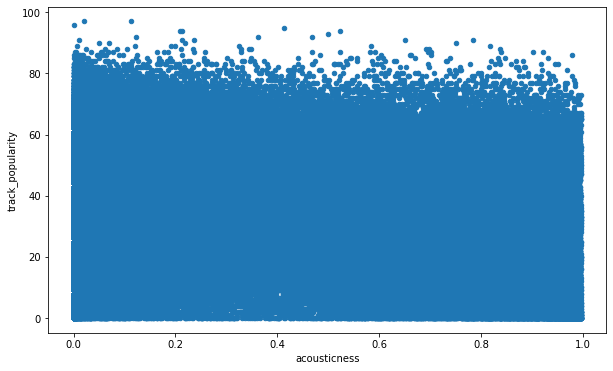

In [14]:
ax = train.plot(x = 'acousticness', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'acousticness', 
              ylabel = 'track_popularity')

## MLR Model

In [15]:
# goal is to predict the popularity of a song based on a variety of categorical and numeric variables
ols_object = smf.ols(formula = 'track_popularity~release_year+loudness+artist_popularity+energy+artist_followers+explicit+danceability+time_signature+duration_ms+tempo+key+mode+valence+speechiness+liveness+instrumentalness+acousticness', data = train)
model = ols_object.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:22:12   Log-Likelihood:            -9.4539e+05
No. Observations:              240719   AIC:                         1.891e+06
Df Residuals:                  240701   BIC:                         1.891e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -888.0526      3.344   -265.585      0.000    -894.606    -881.499
release_year          0.4487      0.002    270.465      0.000       0.445       0.452
loudness              0.1250      0.010     13.043      0.000       0.106       0.144
artist_popularity     0.4707      0.003    147.168      0.000       0.464       0.477
energy               -2.4503      0.213    -11.521      0.000      -2.867      -2.033
artist_followers   3.954e-09   6.58e-09      0.601      0.548   -8.94e-09    1.69e-08
explicit              3.5059      0.122     28.717      0.000       3.267       3.745
danceability          5.9260      0.208     28.442      0.000       5.518       6.334
time_signature        0.1686      0.057      2.982      0.003       0.058       0.279
duration_ms        3.387e-06   2.73e-07     12.424      0.000    2.85e-06    3.92e-06
tempo                 0.0068      0.001      7.737      0.000       0.005       0.009
key                   0.0136      0.007      1.904      0.057      -0.000       0.028
mode                  0.3795      0.054      6.987      0.000       0.273       0.486
valence              -1.5078      0.136    -11.067      0.000      -1.775      -1.241
speechiness          -7.3323      0.156    -46.875      0.000      -7.639      -7.026
liveness             -5.2434      0.136    -38.439      0.000      -5.511      -4.976
instrumentalness     -1.5645      0.128    -12.201      0.000      -1.816      -1.313
acousticness         -3.0547      0.112    -27.210      0.000      -3.275      -2.835
==============================================================================
Omnibus:                     7569.241   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20131.394
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                       4.408   Cond. No.                     6.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable Significance 
From the initial model, we can see that assuming a significance level of 0.05, all of the variables appear to be significant. If we change the significance level to 0.01, we see that key is no longer a signifiance variable. 

## Checking for non-linearity

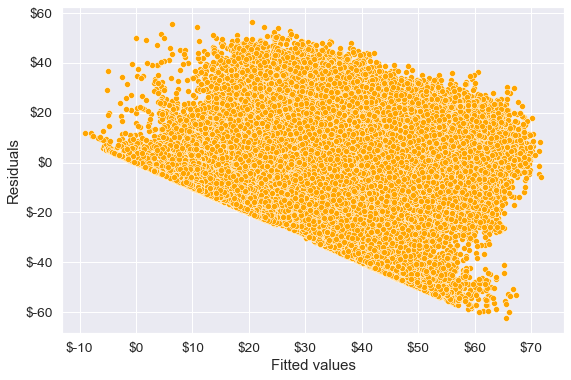

In [16]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
#sns.lineplot(x = [track_popularity.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

## Variable Interactions

In [17]:
# genre is a qualitative predictor
# checking the distribution of values of genre
train.genres.value_counts()

pop              69216
rock             49702
pop & rock       43324
miscellaneous    35633
jazz             13331
hoerspiel        12483
hip hop           6952
folk              2819
latin             2124
metal             1655
rap               1473
country           1220
electronic         787
Name: genres, dtype: int64

## Model with Genre interaction terms

In [18]:
# predicting the popularity of a song based on a variety of categorical and numeric variables interacted with genres
ols_obj_genre = smf.ols(formula = 'track_popularity~release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_1 = ols_obj_genre.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     897.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:22:43   Log-Likelihood:            -9.3867e+05
No. Observations:              240719   AIC:                         1.878e+06
Df Residuals:                  240486   BIC:                         1.880e+06
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1336.9278     50.671    -26.384      0.000   -1436.243   -1237.613
genres[T.electronic]                       1211.6921    101.644     11.921      0.000    1012.473    1410.912
genres[T.folk]                              -32.9087     62.729     -0.525      0.600    -155.856      90.038
genres[T.hip hop]                           608.1491     62.925      9.665      0.000     484.818     731.480
genres[T.hoerspiel]                         977.5096     61.633     15.860      0.000     856.711    1098.309
genres[T.jazz]                              391.1688     52.624      7.433      0.000     288.027     494.311
genres[T.latin]                             308.3626     66.632      4.628      0.000     177.765     438.960
genres[T.metal]                             836.3528    105.323      7.941      0.000     629.923    1042.783
genres[T.miscellaneous]                     272.7689     51.252      5.322      0.000     172.316     373.222
genres[T.pop]                               272.0216     51.117      5.322      0.000     171.833     372.211
genres[T.pop & rock]                        634.2598     51.419     12.335      0.000     533.479     735.040
genres[T.rap]                              -232.8517    123.008     -1.893      0.058    -473.944       8.241
genres[T.rock]                              725.7028     51.353     14.132      0.000     625.053     826.353
release_year                                  0.6854      0.025     26.942      0.000       0.636       0.735
release_year:genres[T.electronic]            -0.6142      0.051    -12.034      0.000      -0.714      -0.514
release_year:genres[T.folk]                   0.0016      0.032      0.050      0.960      -0.060       0.063
release_year:genres[T.hip hop]               -0.3170      0.031    -10.114      0.000      -0.378      -0.256
release_year:genres[T.hoerspiel]             -0.5058      0.031    -16.185      0.000      -0.567      -0.445
release_year:genres[T.jazz]                  -0.1976      0.026     -7.479      0.000      -0.249      -0.146
release_year:genres[T.latin]                 -0.1581      0.034     -4.711      0.000      -0.224      -0.092
release_year:genres[T.metal]                 -0.4356      0.053     -8.245      0.000      -0.539      -0.332
release_year:genres[T.miscellaneous]         -0.1443      0.026     -5.609      0.000      -0.195      -0.094
release_year:genres[T.pop]                   -0.1480      0.026     -5.769      0.000      -0.198      -0.098
release_year:genres[T.pop & rock]            -0.3356      0.026    -13.004      0.000      -0.386      -0.285
release_year:genres[T.rap]                    0.1086      0.061      1.782      0.075      -0.011       0.228
rel

In [19]:
# From model 1, we see that the R^2 value went up to 0.446 when the interaction terms with genre were added
# now let's try adding some terms with transformations 
ols_obj2 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres)**2+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_2 = ols_obj2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     649.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:23:04   Log-Likelihood:            -9.3638e+05
No. Observations:              240719   AIC:                         1.873e+06
Df Residuals:                  240384   BIC:                         1.877e+06
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -478.8324    318.001     -1.506      0.132   -1102.105     144.441
genres[T.electronic]                                         385.9728   1094.759      0.353      0.724   -1759.727    2531.673
genres[T.folk]                                               915.8383    531.327      1.724      0.085    -125.549    1957.225
genres[T.hip hop]                                              8.3269    488.428      0.017      0.986    -948.980     965.634
genres[T.hoerspiel]                                        -3104.3121    443.201     -7.004      0.000   -3972.974   -2235.650
genres[T.jazz]                                              1158.3296    371.609      3.117      0.002     429.986    1886.673
genres[T.latin]                                              -13.9156    530.969     -0.026      0.979   -1054.601    1026.770
genres[T.metal]                                            -2087.2629   1081.710     -1.930      0.054   -4207.386      32.860
genres[T.miscellaneous]                                     -488.8404    327.119     -1.494      0.135   -1129.985     152.304
genres[T.pop]                                              -1291.5849    324.417     -3.981      0.000   -1927.433    -655.736
genres[T.pop & rock]                                         337.4333    332.944      1.013      0.311    -315.129     989.995
genres[T.rap]                                              -1631.3729    644.615     -2.531      0.011   -2894.801    -367.945
genres[T.rock]                                             -1158.5595    327.166     -3.541      0.000   -1799.796    -517.323
release_year                                                   0.2290      0.159      1.440      0.150      -0.083       0.541
release_year:genres[T.electronic]                             -0.1383      0.547     -0.253      0.800      -1.210       0.933
release_year:genres[T.folk]                                   -0.4315      0.266     -1.621      0.105      -0.953       0.090
release_year:genres[T.hip hop]                                 0.0134      0.243      0.055      0.956      -0.463       0.490
release_year:genres[T.hoerspiel]                               1.5731      0.224      7.025      0.000       1.134       2.012
release_year:genres[T.jazz]                                   -0.5629      0.187     -3.007      0.003      -0.930      -0.196
release_year:genres[T.latin]                                   0.0262      0.266      0.099      0.921      -0.494       0.547
release_year:genres[T.metal]                                   1.0866      0.542      2.003      0.045       0.023       2.150
release_year:genres[T.miscellaneous

In [20]:
# From model 1, we see that the R^2 value went up to 0.446 when the interaction terms with genre were added
# now let's try adding some terms with transformations 
ols_obj3 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres)**2+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_3 = ols_obj3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     508.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:23:26   Log-Likelihood:            -9.3574e+05
No. Observations:              240719   AIC:                         1.872e+06
Df Residuals:                  240287   BIC:                         1.877e+06
Df Model:                         431                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -692.0651    161.895     -4.275      0.000   -1009.375    -374.755
genres[T.electronic]                                         688.5032   1142.355      0.603      0.547   -1550.483    2927.490
genres[T.folk]                                              1195.2148    461.896      2.588      0.010     289.910    2100.520
genres[T.hip hop]                                           -118.2902    442.981     -0.267      0.789    -986.521     749.941
genres[T.hoerspiel]                                        -2957.5913    423.433     -6.985      0.000   -3787.509   -2127.673
genres[T.jazz]                                              1078.0061    245.900      4.384      0.000     596.049    1559.963
genres[T.latin]                                             -458.2191    643.480     -0.712      0.476   -1719.423     802.984
genres[T.metal]                                              -85.9171   1259.946     -0.068      0.946   -2555.379    2383.544
genres[T.miscellaneous]                                     -346.9441    179.048     -1.938      0.053    -697.873       3.985
genres[T.pop]                                               -934.3704    174.189     -5.364      0.000   -1275.776    -592.964
genres[T.pop & rock]                                         444.7373    186.982      2.379      0.017      78.257     811.217
genres[T.rap]                                               -743.3069    417.036     -1.782      0.075   -1560.688      74.074
genres[T.rock]                                              -642.4211    180.314     -3.563      0.000    -995.831    -289.011
release_year                                                   0.3280      0.083      3.945      0.000       0.165       0.491
release_year:genres[T.electronic]                             -0.2786      0.574     -0.486      0.627      -1.403       0.846
release_year:genres[T.folk]                                   -0.5604      0.232     -2.413      0.016      -1.016      -0.105
release_year:genres[T.hip hop]                                 0.0814      0.221      0.369      0.712      -0.351       0.514
release_year:genres[T.hoerspiel]                               1.5212      0.216      7.042      0.000       1.098       1.945
release_year:genres[T.jazz]                                   -0.5076      0.127     -4.010      0.000      -0.756      -0.260
release_year:genres[T.latin]                                   0.2535      0.322      0.788      0.430      -0.377       0.884
release_year:genres[T.metal]                                   0.0902      0.633      0.142      0.887      -1.151       1.332
release_year:genres[T.miscellaneous

In [22]:
# applying a quadratic transformation on the interaction terms with the continuous variables 
# that are most strongly correlated with the response, track_popularity
ols_obj4 = smf.ols(formula = 'track_popularity~(release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres+time_signature*genres)**2+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = train)
model_4 = ols_obj4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     436.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:25:45   Log-Likelihood:            -9.3564e+05
No. Observations:              240719   AIC:                         1.872e+06
Df Residuals:                  240215   BIC:                         1.878e+06
Df Model:                         503                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -776.1365    178.716     -4.343      0.000   -1126.416    -425.857
genres[T.electronic]                                        2650.4526   1367.992      1.937      0.053     -30.777    5331.682
genres[T.folk]                                              1504.9430    478.052      3.148      0.002     567.973    2441.913
genres[T.hip hop]                                           -845.6979    716.303     -1.181      0.238   -2249.632     558.236
genres[T.hoerspiel]                                        -2910.7776    442.464     -6.579      0.000   -3777.995   -2043.560
genres[T.jazz]                                               863.6201    268.172      3.220      0.001     338.009    1389.231
genres[T.latin]                                             -302.9175    668.626     -0.453      0.651   -1613.407    1007.572
genres[T.metal]                                             1000.1779    643.686      1.554      0.120    -261.431    2261.786
genres[T.miscellaneous]                                     -353.3758    196.471     -1.799      0.072    -738.454      31.702
genres[T.pop]                                               -848.1507    193.300     -4.388      0.000   -1227.013    -469.289
genres[T.pop & rock]                                         493.8560    209.083      2.362      0.018      84.058     903.654
genres[T.rap]                                                -37.2430     85.636     -0.435      0.664    -205.087     130.601
genres[T.rock]                                              -610.6354    201.761     -3.027      0.002   -1006.081    -215.189
release_year                                                   0.3623      0.096      3.769      0.000       0.174       0.551
release_year:genres[T.electronic]                             -1.3680      0.712     -1.922      0.055      -2.763       0.027
release_year:genres[T.folk]                                   -0.7189      0.243     -2.961      0.003      -1.195      -0.243
release_year:genres[T.hip hop]                                 0.4417      0.357      1.238      0.216      -0.258       1.141
release_year:genres[T.hoerspiel]                               1.5054      0.228      6.612      0.000       1.059       1.952
release_year:genres[T.jazz]                                   -0.3885      0.141     -2.764      0.006      -0.664      -0.113
release_year:genres[T.latin]                                   0.1727      0.340      0.509      0.611      -0.493       0.838
release_year:genres[T.metal]                                  -0.4297      0.324     -1.325      0.185      -1.065       0.206
release_year:genres[T.miscellaneous

### Analysis
We can see from model 4 yields the highest R^2 value of 0.477

## Creating the Test Dataset

In [23]:
# filtering the original dataset for only songs released in 2021
test = spotify_data[spotify_data['release_year']==2021]
test

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.3060,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.1060,0.3080,0.000036,0.1210,0.499,88.933,4
3,16996777,rap,Juice WRLD,96,Robbery,0,240527,1,2021,0.708,...,2,-5.181,1,0.0442,0.3480,0.000000,0.2220,0.543,79.993,4
4,5988689,rap,Roddy Ricch,88,Big Stepper,0,175170,0,2021,0.753,...,8,-8.469,1,0.2920,0.0477,0.000000,0.1970,0.616,76.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,300653,miscellaneous,Burning Spear,53,2000 Years,0,242960,0,2021,0.830,...,1,-11.238,1,0.0736,0.3740,0.874000,0.0633,0.751,74.789,4
2467,10903,jazz,Coffee Shop Jazz Relax,55,Incredible New Years Resolutions,6,129010,0,2021,0.805,...,10,-20.928,1,0.0867,0.9910,0.921000,0.0899,0.104,100.612,3
2468,10903,jazz,Coffee Shop Jazz Relax,55,Friendly Jazz Piano Solo - Vibe for New Years ...,6,108019,0,2021,0.783,...,0,-19.725,1,0.0860,0.9870,0.883000,0.0656,0.141,79.981,4
2469,13616,hip hop,167 Gang,53,Dalle popolari,59,155172,1,2021,0.775,...,1,-7.898,0,0.2340,0.3490,0.000000,0.2980,0.373,115.977,4


## Completing the Predictions

In [25]:
#Using the predict() function associated with the 'model' object to make predictions of track_popularity on test (unknown) data
pred_pop = model_4.predict(test)

0       78.848081
1       78.641783
2       79.120805
3       77.552708
4       59.675583
          ...    
2466    45.795195
2467    46.504115
2468    44.082292
2469    41.044859
2470    60.401232
Length: 2471, dtype: float64

### Visualization that compares the predicted car prices with the actual car prices

Text(0, 0.5, 'Predicted track popularity')

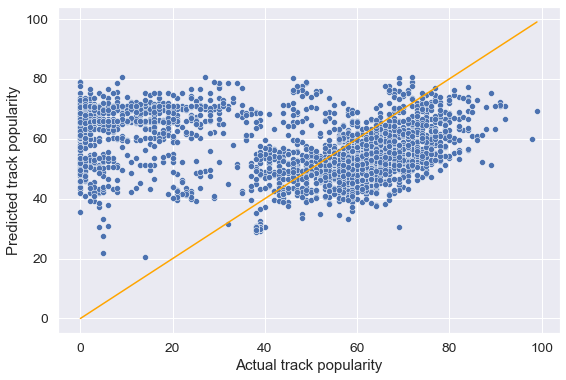

In [26]:
sns.scatterplot(x = test.track_popularity, y = pred_pop)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,test.track_popularity.max()], y = [0,test.track_popularity.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual track popularity')
plt.ylabel('Predicted track popularity')

### RMSE of predicted track popularity

In [27]:
np.sqrt(((test.track_popularity - pred_pop)**2).mean())

34.04846768510327

### Residual Standard Error based on training data

In [28]:
np.sqrt(model_4.mse_resid)

11.810358362162512